# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [368]:
# Import the appropriate libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
north_df
south_df = pd.read_csv("SouthCallCenter.csv")
south_df.head(2)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1


## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, make sure you answer the following questions:

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

In [216]:
#reading north_df dataframe :
north_df.describe()
north_df.head(5)

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,percent
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,0.4
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,0.4
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,0.4
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,0.4
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,0.4


In [217]:
#droping repetitive values:
north_df.dropna(inplace = True)
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,percent
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1,0.4
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1,0.4
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1,0.4
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1,0.4
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1,0.4


In [187]:
#1.How many reps are in each branch? Answer :9 in north branch 

north_df['Rep ID'].nunique()

9

In [218]:
# Put your EDA code here

#reading south_df dataframe :
south_df.describe()
south_df.head()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,percent
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1,0.4
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1,0.4
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1,0.4
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1,0.4
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1,0.4


In [219]:
#droping repetitive values:
south_df.dropna(inplace = True)
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls,percent
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1,0.4
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1,0.4
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1,0.4
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1,0.4
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1,0.4


In [190]:
#1.How many reps are in each branch? Answer : 11 in south branch

south_df['Rep ID'].nunique()

11

In [235]:
#2.What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
# NORTH BRANCH
north_df.mean()

Unnamed: 0               122.000000
Lost Call                  0.020408
Abandoned                  0.028571
Busy Minutes               9.987755
Not Ready Minutes          1.914286
Incoming Wait Time         3.048780
During Call Wait Time      2.967347
Calls                      1.000000
dtype: float64

In [236]:
#2.What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
# SOUTH BRANCH
south_df.mean()

Unnamed: 0               156.500000
Lost Call                  0.035032
Abandoned                  0.012739
Busy Minutes              10.054140
Not Ready Minutes          1.910828
Incoming Wait Time         3.000000
During Call Wait Time      3.076433
Calls                      1.000000
dtype: float64

In [240]:
#What is the number of calls taken for each time block? NORTH
time = north_df.groupby('Calls')['Time Block'].value_counts()
time 


Calls  Time Block
1      12:00 PM      45
       10:00 AM      43
       2:00 PM       35
       3:00 PM       30
       4:00 PM       28
       11:00 AM      25
       1:00 PM       17
       5:00 PM       17
       9:00 AM        5
Name: Time Block, dtype: int64

In [336]:
#What is the number of calls taken for each time block?SOUTH
time1 = south_df.groupby('Calls')['Time Block'].value_counts()
time1 


Calls  Time Block
1      12:00 PM      75
       10:00 AM      56
       3:00 PM       43
       11:00 AM      31
       2:00 PM       30
       5:00 PM       26
       4:00 PM       25
       1:00 PM       23
       9:00 AM        5
Name: Time Block, dtype: int64

### EDA Results

Make note of your results here!

1. How many reps are in each branch?
2. What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for each branch?
3. What is the number of calls taken for each time block?

1. North branch has 9 reps where as South branch has 11 reps.

2. North branch:average busy minutes:9.987755 ,not ready minutes:1.914286 ,incoming wait time:3.048780,during call wait time:2.967347
South branch:average busy minutes:10.054140 ,not ready minutes:1.910828 ,incoming wait time:3.000000  ,during call wait time:3.076433


3. No.of calls for North branch: 
       12:00 PM      45
       10:00 AM      43
       2:00 PM       35
       3:00 PM       30
       4:00 PM       28
       11:00 AM      25
       1:00 PM       17
       5:00 PM       17
       9:00 AM        5
No.of calls for South branch :
      12:00 PM      75
       10:00 AM      56
       3:00 PM       43
       11:00 AM      31
       2:00 PM       30
       5:00 PM       26
       4:00 PM       25
       1:00 PM       23
       9:00 AM        5
       

## Cleaning Data

Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets:

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

# Clean your data here
#1.Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
Answer: Yes! Incoming wait time null values is related to outgoing calls .
As we know that the Incoming Wait Time is the amount of time after assigned rep is available to take the call customer waits 
for representative to pick up a call. This is tracked in seconds. Whereas , in outgoing calls it is the opposite as the reps 
are calling to the customers . That is why the Incoming wait time is appearing NaN when there is an outgoing call in the dataset.
 
#2.In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
Answer: I do not see any two seperate Yes values for sale in North df data frame.

#3.Are there duplicates in the two data sets? If there are, how did you handle them?.I dropped duplicates.

#4.Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
I did not find any unnecessary data, I think every column has a unique purpose to it. 

In [339]:
#2.
north_sales = north_df[['Rep ID','Sale']]
pd.set_option('display.max_rows', None)
north_sales.head(2)

,Rep ID,Sale
0,Brent,NO
1,Cam,NO


In [343]:

#3.
df.duplicated()
df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [345]:
df.drop_duplicates()
df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


### Cleaning Data Results

Make note of your results!

1. Incoming wait time is null in many places. Do all of those places correspond to outgoing calls?
2. In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
3. Are there duplicates in the two data sets? If there are, how did you handle them?
4. Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

## Data Manipulation

Before you begin answering any questions, combine the two datasets together to create a third dataframe called `df`. You can use this third dataframe to compare the two call centers to company-wide trends.

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

In [243]:
# combine the two datasets together to create a third dataframe called `df`:
df = pd.concat([south_df, north_df])
df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


In [244]:
#1.Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
df.groupby(['Rep ID','Branch'])['Calls'].sum()

#rep in North branch who has the highest number of calls: Brent:37
#rep in South branch who has the highest number of calls: Eric:35

Rep ID  Branch
Alice   South     20
Amanda  North     23
Andy    North     23
Brent   North     37
Cam     North     24
Duke    North     29
Eric    South     35
George  South     29
Helga   South     31
Joe     North     26
Josh    South     26
Karl    South     28
Kate    South     29
Lilly   North     30
Randy   South     33
Sandy   South     32
Sharon  South     25
Susan   South     26
Todd    North     29
Xander  North     24
Name: Calls, dtype: int64

In [245]:
#2.The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
#north_df abandoned call avg. :
call_drop1 = north_df["Abandoned"].sum()/north_df["Calls"].sum()*100
call_drop1

2.857142857142857

In [255]:
#south_df abandoned call avg. :
call_drop2 = south_df['Abandoned'].sum()/south_df["Calls"].sum()*100
call_drop2.round(2)

1.27

In [365]:
#average call abandonment rate for the whole company:
call_drop3 = df['Abandoned'].sum()/df["Calls"].sum()*100
call_drop3.round(2)

1.97

#2. Do any of these fall out of the optimal range of 2-5%?
Answer: The north branch call abandonment rate is within the 2-5% optimal range whereas south abandonment rate and the abandonment rate for the whole company is below the optimal range of 2-5%.

In [258]:
#3.Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
#north_df


service_level =  (north_df["Incoming Wait Time"] <= 2.0).sum()*100
service_level.sum()/100

33.0

In [285]:
#south_df

service_level1 =  (south_df["Incoming Wait Time"] <= 2.0).sum()*100
service_level1.sum()/100

48.0

In [366]:
#percentage of calls answered within 2 seconds the entire company:

service_level2 =  (df["Incoming Wait Time"] <= 2.0).sum()*100
service_level2.sum()/100


81.0

In [351]:
#4.For each branch and the entire company, what is the average speed of answer?
#average speed of answer north:
Avg_speed_answer_north = north_df["Incoming Wait Time"] /north_df["Calls"]
Avg_speed_answer_north.mean()

3.048780487804878

In [352]:
#average speed of answer for south:
Avg_speed_answer_south = south_df["Incoming Wait Time"] /south_df["Calls"]
Avg_speed_answer_south.mean()

3.0

In [364]:
#average speed of answer for entire company:


Avg_speed_answer_company = df["Incoming Wait Time"] /df["Calls"]
Avg_speed_answer_company.mean()

3.019230769230769

### Data Manipulation Results

1. Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
2. The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
3. Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each company and the entire company?
4. For each branch and the entire company, what is the average speed of answer?

1.Answer: Brent from north branch has the highest no.of 37 calls ; whereas in south Eric with 35 calls has the highest no.

2.Answer: average call abandonment rate for north :2.85  ,average call abandonment rate for south:1.27  ,average call abandonment rate for company:1.97.The north branch call abandonment rate is within the 2-5% optimal range whereas south abandonment rate and the abandonment rate for the whole company is below the optimal range of 2-5%. 

3.Answer: Service level north:33.0  , Service level south:48.0   , Service level company: 81.0


4.Answer:average speed of answer north:3.048 ,average speed of answer south:3.0 ,average speed of answer company:3.019

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why.

1. What is the average abandonment rate per queue?
2. What is the service level and average speed of answer per each rep?
3. For each type of call purpose, how many calls are outgoing vs. incoming?

In [269]:
# Create visualization 1 here


# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

In [270]:
queue_dict



,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
Queue,,,,,,,,
A,11084,1,4,946,181,116.0,272,96
B,18806,4,3,1501,288,134.0,455,149
C,21602,4,1,1409,251,160.0,435,138
D,27539,7,3,1748,349,218.0,531,176


In [275]:
abandonment_rates

{'A': 0.041666666666666664,
 'B': 0.020134228187919462,
 'C': 0.007246376811594203,
 'D': 0.017045454545454544}

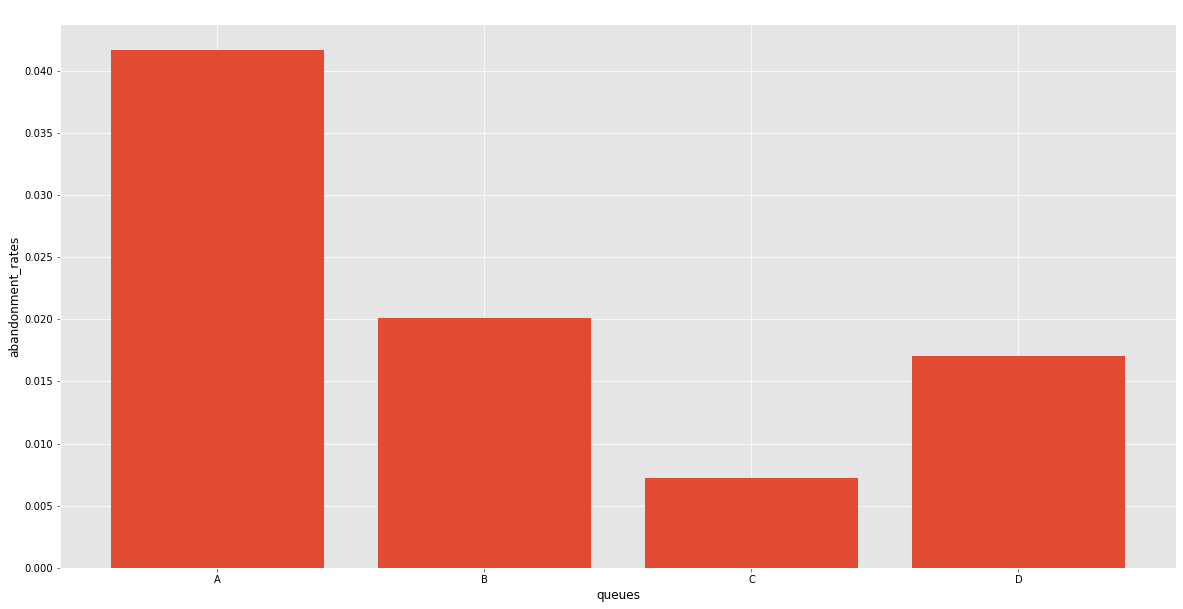

In [298]:
# Create visualization 1 here
x = list(abandonment_rates.keys())
y = list(abandonment_rates.values())
plt.bar(x,y)
plt.title('Average abandonment rate per queue' , color = 'white')
plt.xticks(color = 'black')
plt.yticks(color ='black')
plt.xlabel('queues',color='black')
plt.ylabel('abandonment_rates',color='black')
plt.show()

In [283]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
service_level

Rep ID
Amanda    60.000000
Andy      30.000000
Brent     75.000000
Cam       45.454545
Duke      42.857143
Joe       20.000000
Lilly     33.333333
Todd      33.333333
Xander    33.333333
Name: Service Level %, dtype: float64

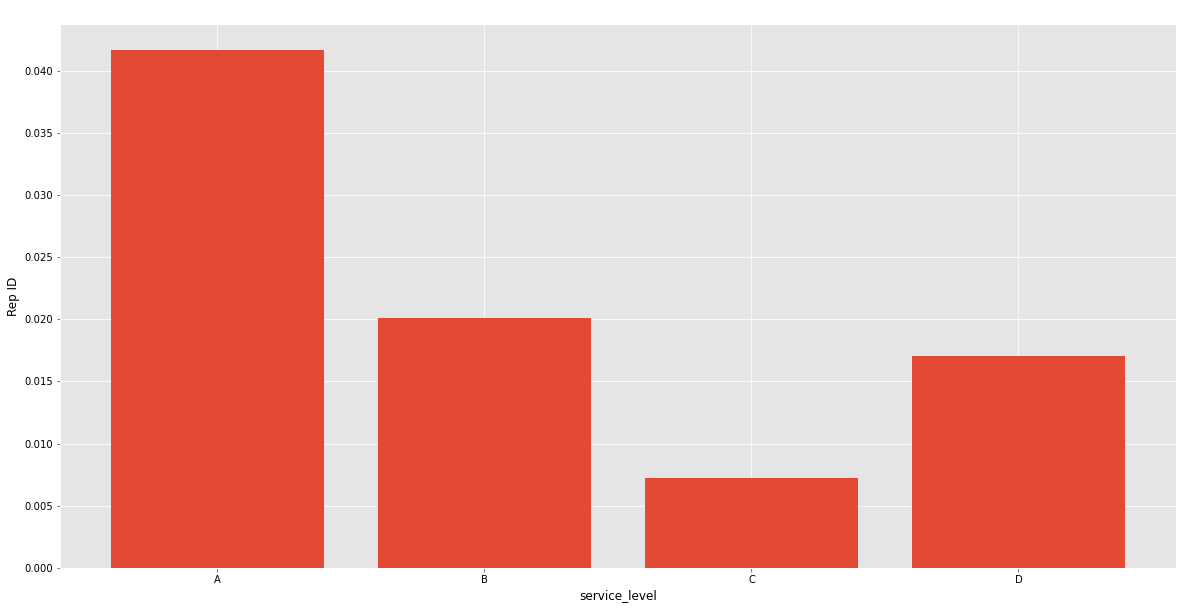

In [292]:
#2.What is the service level and average speed of answer per each rep?

plt.bar(x,y)
plt.title('Service level' , color = 'white')
plt.xticks(color = 'black')
plt.yticks(color ='black')
plt.xlabel('service_level',color='black')
plt.ylabel('Rep ID',color='black')
plt.savefig('bar_horizontal.png')
plt.show()


In [314]:


purpose_group = df.groupby("Call Purpose")

call_purpose = ["Complaint", "Product Support", "Sales Support"]
call_purpose  

['Complaint', 'Product Support', 'Sales Support']

In [308]:
# Create visualization 3 here
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

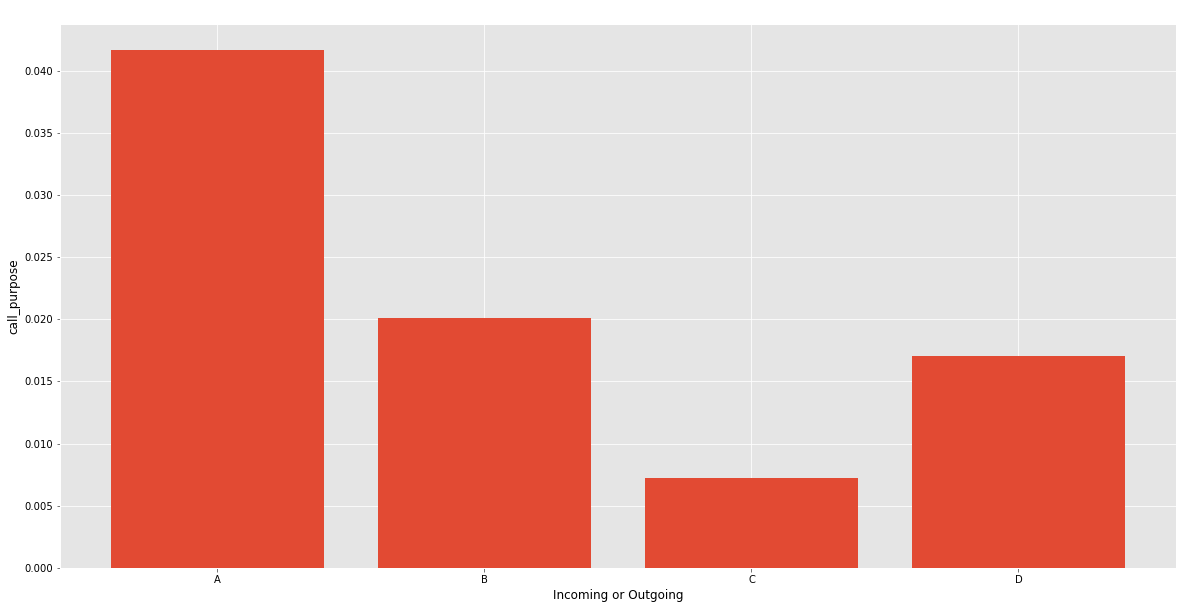

In [318]:
#3.For each type of call purpose, how many calls are outgoing vs. incoming?
plt.bar(x,y)
plt.title('Call purposes VS incoming and outgoing calls' , color = 'white')
plt.xticks(color = 'black')
plt.yticks(color ='black')
plt.xlabel('Incoming or Outgoing',color='black')
plt.ylabel('call_purpose',color='black')
plt.savefig('bar_grouped.png')
plt.show()


### Visualization Results

For each chart you created, explain why you chose the chart style you chose.

I have choosen bar charts for my visualization because they are best for displaying the highs and lows points for my analysis. 

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.

1. Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
2. Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
3. Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

1.Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?
Answer#
According to the information collected  by the above mentioned KPI's the South branch is operating more efficiently, that is because of the following reasons : 
~It has a relatively high no. of employees.
~South branch incoming wait time is less then the north branch.
~Call abondment rate and speed of answer is more efficient compared to the north branch.
~Also south branch service level is higher.


2.Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?
Keeping forward the facts and figures of the ananlysis the North branch will benefit more from the addional assistance. They have a low count on reps, there incoming wait time is more and there call abaondment rate is also higher then the south branch.
Extra help will definitely increase there productivity.




## Submit Your Work

After you have completed your work on the assignment, push your work to your Github repo. Navigate to the repo, copy the link to your assignment and paste the URL in the Canvas assignment's submission box. 

## Bonus Mission

Create a visualization that answers this question:

1. For each call purpose, how many calls (incoming and outgoing) take place in each time block?

In [ ]:
# Create your visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:
